In [1]:
import gps_particle_data
import wget
import os
import numpy as np 
import time
import json
import sys
import math
from datetime import datetime, timedelta, date
from itertools import compress
from random import randint
import urllib2
import aacgmv2
import scipy
import matplotlib
from matplotlib import gridspec
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
start_date = datetime(2016,1,1,0,0,0);
end_date = datetime(2017,1,1,0,0,0);
ms = gps_particle_data.meta_search();
ms.load_data(start_date,end_date);


Loading data for satellite  56
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160103_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160110_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160117_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160124_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160131_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160207_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160214_v1.03.ascii
File : https://www.ngdc.noaa.gov/stp/space-weather/satellite-data/satellite-systems/gps/data/ns56/ns56_160221_v1.0

In [3]:
#Get earthquakes for given conditions
eq_s = gps_particle_data.earthquake_search(start_date,end_date, min_magnitude=4,min_lat=-90,max_lat=90,min_lon=-180,max_lon=180)
#Calculate L-shells of the earthquakes
L_shells = eq_s.get_L_shells(400.0)
#EQ datetimes
eq_datetimes = eq_s.get_datetimes()

In [4]:
#find mean and standard deviation for given period of time
output_data = ms.get_all_data_by_satellite()
signame = 'rate_electron_measured';
signal = np.asarray(output_data[56][signame])[:,2];
avg = np.mean(signal)
stddev = np.std(signal)
print avg, stddev

842.021599411 1657.60473582


In [5]:
r = output_data[56][signame]
#calculations performed w.r.t. channel 2 (electron rates)
ch2 = np.asarray(r)[:,2]
#find difference between signal and average
sig_dif = np.subtract(ch2, avg)
#ratio in terms of std dev
ratio = np.divide(sig_dif, stddev)

indices = []
burst_indices = ratio>4

#get indices of the signal points with sig_dif value > 4 sigma
for i in range(len(burst_indices)):
    if burst_indices[i] == True:
        indices.append(i)

In [7]:
his_data = [] #not sure this one is necessary?
dday = output_data[56]['decimal_day']
ls = output_data[56]['L_shell']
#trying to match EQ and PB based on two conditions: delta T < 0.5 days and delta L (in this case) < 1
for i in indices:
    for j in range(len(L_shells)):
        date = datetime.strptime(str(eq_datetimes[j])[:10], "%Y-%m-%d")
        int_diy = date.timetuple().tm_yday
        rest = (float(str(eq_datetimes[j])[11:13])/24) + (float(str(eq_datetimes[j])[14:16])/(24*60))+(float(str(eq_datetimes[j])[17:19])/(24*3600))
        diy = int_diy + rest
        del_T = dday[i]-diy
        del_L = ls[i]-L_shells[j]
        if abs(del_L) < 1 and  abs(del_T) < 0.5:
            dT = del_T*24
            print dT, ls[i]
            #append it to the file
            with open('temp_cor56_largeL.ascii', 'a') as f:
                np.savetxt(f, dT)

[ 1.90082533] [ 4.809214]
[ 1.96749733] [ 4.791547]
[ 2.03416933] [ 4.785486]
[ 2.10084133] [ 4.786989]
[ 2.16748933] [ 4.791688]
[ 2.23416133] [ 4.795856]
[ 2.30083333] [ 4.796925]
[ 2.36750533] [ 4.794606]
[ 2.43417733] [ 4.790285]
[ 2.50082533] [ 4.787145]
[ 2.56749733] [ 4.788767]
[-11.67693644] [ 4.381161]
[-11.61028844] [ 4.348908]
[-11.54361644] [ 4.323939]
[-11.47694444] [ 4.305949]
[-11.41027244] [ 4.294864]
[-11.34360044] [ 4.29059]
[-11.27695244] [ 4.293149]
[-11.21028044] [ 4.30269]
[-11.14360844] [ 4.319397]
[ 0.72304756] [ 4.491666]
[ 0.78971956] [ 4.417236]
[ 0.85639156] [ 4.35329]
[ 0.92306356] [ 4.299138]
[ 0.98971156] [ 4.254006]
[ 1.05638356] [ 4.21754]
[ 1.12305556] [ 4.189235]
[ 1.18972756] [ 4.168699]
[ 1.25639956] [ 4.133048]
[ 1.32304756] [ 4.127414]
[ 1.38971956] [ 4.129093]
[ 1.45639156] [ 4.138032]
[ 1.52306356] [ 4.154276]
[ 1.58971156] [ 4.177891]
[ 1.65638356] [ 4.209013]
[ 1.72305556] [ 4.247769]
[ 1.78972756] [ 4.294421]
[ 1.85639956] [ 4.349181]
[ 1.923

[ 8.63860578] [ 4.222323]
[ 8.70527778] [ 4.198649]
[ 8.77194978] [ 4.181816]
[ 8.83862178] [ 4.171732]
[ 8.90526978] [ 4.168333]
[ 8.97194178] [ 4.17179]
[ 9.03861378] [ 4.18196]
[ 9.10528578] [ 4.198909]
[ 9.17193378] [ 4.222747]
[ 9.23860578] [ 4.25358]
[ 9.30527778] [ 4.291568]
[ 9.37194978] [ 4.336875]
[ 9.43862178] [ 4.389764]
[-5.33721156] [ 4.197658]
[-5.27056356] [ 4.184529]
[-5.20389156] [ 4.178119]
[-5.13721956] [ 4.178429]
[-5.07054756] [ 4.185451]
[-5.00389956] [ 4.199235]
[-10.54222489] [ 4.431632]
[-10.47555289] [ 4.374691]
[-10.40888089] [ 4.327808]
[-10.34223289] [ 4.290346]
[-9.74223289] [ 4.28611]
[-9.67556089] [ 4.320761]
[-9.60888889] [ 4.36374]
[-5.14222489] [ 4.422537]
[-5.07555289] [ 4.366571]
[-5.00888089] [ 4.318351]
[-4.94223289] [ 4.277538]
[-4.20888889] [ 4.283982]
[-4.14221689] [ 4.326113]
[-4.07554489] [ 4.375745]
[-4.00889689] [ 4.43311]
[ 0.79110311] [ 4.479122]
[ 0.85777511] [ 4.43735]
[ 0.92444711] [ 4.403619]
[ 0.99111911] [ 4.377518]
[ 1.05776711] [

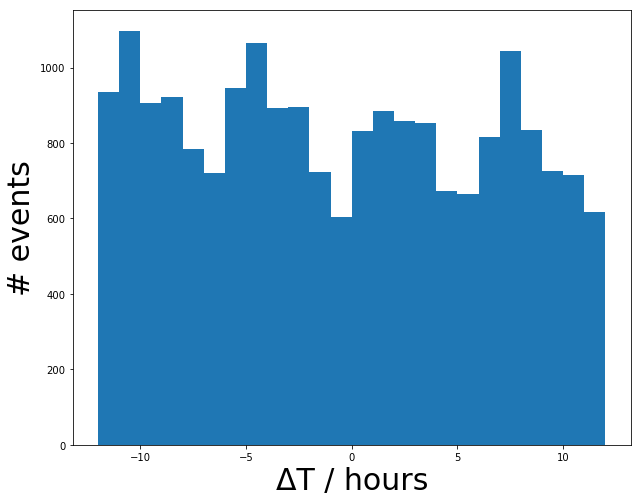

In [9]:
#plot the data so far
fig = plt.figure(figsize=(10, 8))
his = np.loadtxt('temp_cor56_largeL.ascii')
plt.hist(his, bins = np.arange(min(his), max(his)+1))
plt.xlabel(u'ΔT / hours', fontsize  = 30)
plt.ylabel('# events', fontsize = 30)
plt.show()